# Autoencoder

## Importando as bibliotecas

In [ ]:
# Importando as bibliotecas necessárias:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torchvision.utils as vutils

## Verificando se tem gpu disponível

In [ ]:
# Verificando se tem GPU disponível
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo utilizado: {device}")

Dispositivo utilizado: cpu


## Definindo a arquitetura do modelo

In [ ]:
# Definindo a arquitetura do autoencoder:
class Autoencoder(nn.Module):
    def __init__(self, tam_entrada, tam_vetor_latente):
        super(Autoencoder, self).__init__()

        # Codificador
        self.encoder = nn.Sequential(
            nn.Linear(tam_entrada, 128),
            nn.ReLU(),
            nn.Linear(128, tam_vetor_latente),
            nn.ReLU()
        )

        # Decodificador
        self.decoder = nn.Sequential(
            nn.Linear(tam_vetor_latente, 128),
            nn.ReLU(),
            nn.Linear(128, tam_entrada),
            nn.Tanh()
        )

    # Definindo a passagem dos dados
    def forward(self, entrada):
        codificacao = self.encoder(entrada)
        decodificacao = self.decoder(codificacao)
        return decodificacao

## Preparando o dataset

In [ ]:
# Definindo o conjunto de transformações aplicadas ao conjunto
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Criando nossos loaders para realizar o treinamento do modelo
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5654599.09it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1213371.13it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9730194.46it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2173973.38it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Definindo o modelo e os parâmetros:

In [ ]:
# Inicializando o modelo e definindo
tam_vetor_latente = 64
tamanho_entrada = 28 * 28
autoencoder = Autoencoder(tamanho_entrada, tam_vetor_latente).to(device)
criterio = nn.MSELoss().to(device)
otimizador = optim.Adam(autoencoder.parameters(), lr=0.001)

## Treinando o modelo:

In [ ]:
#  Definindo o número de épocas
epocas = 20

# Define o modelo no modo de treinamento
autoencoder.train()

# Realizando o treinamento do
for epoca in range(epocas):
    for data in trainloader:
        # Extraindo as imagens
        img, _ = data
        # Achatando as imagens
        img = img.view(img.size(0), -1).to(device)

        # Forward
        otimizador.zero_grad()
        output = autoencoder(img)

        # Cálculo da loss
        loss = criterio(output, img)

        # Atualização do parâmetros
        loss.backward()
        otimizador.step()

    print(f'Epoca: {epoca+1}/{epocas}, Loss: {loss.item():.4f}')

Epoca: 1/20, Loss: 0.0599
Epoca: 2/20, Loss: 0.0564
Epoca: 3/20, Loss: 0.0382
Epoca: 4/20, Loss: 0.0441
Epoca: 5/20, Loss: 0.0473
Epoca: 6/20, Loss: 0.0374
Epoca: 7/20, Loss: 0.0345
Epoca: 8/20, Loss: 0.0279
Epoca: 9/20, Loss: 0.0353
Epoca: 10/20, Loss: 0.0382
Epoca: 11/20, Loss: 0.0280
Epoca: 12/20, Loss: 0.0290
Epoca: 13/20, Loss: 0.0317
Epoca: 14/20, Loss: 0.0336
Epoca: 15/20, Loss: 0.0337
Epoca: 16/20, Loss: 0.0274
Epoca: 17/20, Loss: 0.0309
Epoca: 18/20, Loss: 0.0342
Epoca: 19/20, Loss: 0.0280
Epoca: 20/20, Loss: 0.0286


## Visualizando uma mostra

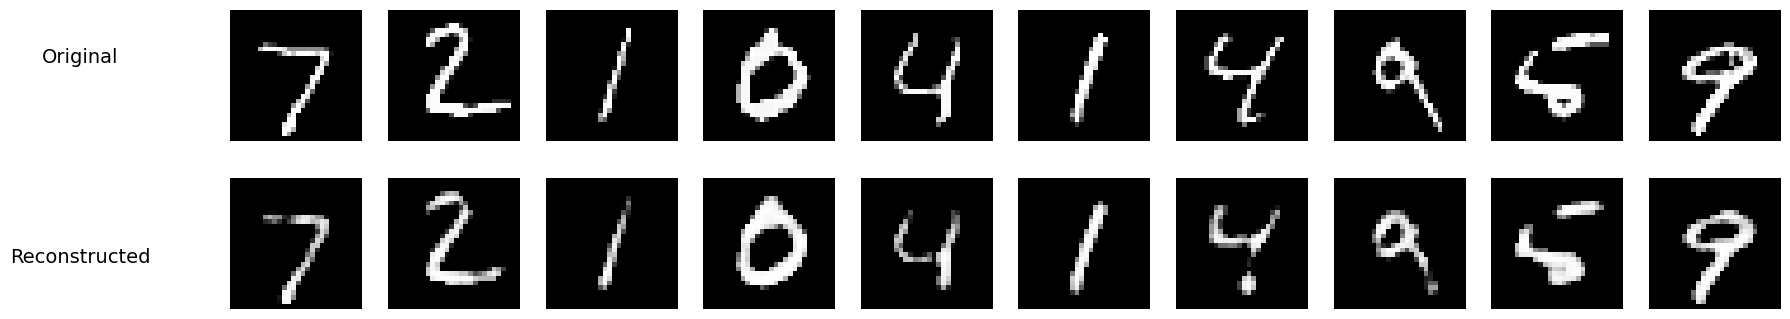

In [ ]:
# Obter um batch de imagens do conjunto de testes
dataiter = iter(testloader)
images, labels = next(dataiter)
images = images.view(images.size(0), -1).to(device)

# Obter saídas do autoencoder
output = autoencoder(images)
images = images.view(images.size(0), 1, 28, 28).cpu()
output = output.view(output.size(0), 1, 28, 28).cpu()

# Restringindo os valores do tensor para o intervalo [0, 1] (para o matplotlib poder exibir sem erros)
images = torch.clamp(images, 0, 1)
output = torch.clamp(output, 0, 1)

# Selecionar apenas a primeira linha de exemplos (por exemplo, 8 imagens)
num_images = 10
images = images[:num_images]
output = output[:num_images]

# Plotar imagens originais e reconstruídas
fig, axes = plt.subplots(2, num_images, figsize=(num_images * 2, 4))

# Adicionar rótulo horizontal à esquerda da linha de imagens originais
fig.text(0.05, 0.75, 'Original', ha='center', va='center', fontsize=14, rotation=0)

# Adicionar rótulo horizontal à esquerda da linha de imagens reconstruídas
fig.text(0.05, 0.25, 'Reconstructed', ha='center', va='center', fontsize=14, rotation=0)

# Plotar imagens originais
for i in range(num_images):
    axes[0, i].imshow(images[i].permute(1, 2, 0).detach().numpy(), cmap='gray')
    axes[0, i].axis('off')

# Plotar imagens reconstruídas
for i in range(num_images):
    axes[1, i].imshow(output[i].permute(1, 2, 0).detach().numpy(), cmap='gray')
    axes[1, i].axis('off')

plt.show()

# Denoising Autoencoder:

## Instânciando o modelo e definindo os parâmetros:

In [ ]:
# Inicializando o modelo e definindo
tam_vetor_latente = 64
tamanho_entrada = 28 * 28
autoencoder_denoising = Autoencoder(tamanho_entrada, tam_vetor_latente).to(device)
criterio = nn.MSELoss().to(device)
otimizador = optim.Adam(autoencoder_denoising.parameters(), lr=0.001)

# Função de ruído:

In [ ]:
# Função para adicionar ruído às imagens
def adicionar_ruido(imagens, intensidade=0.7):
    ruido = torch.randn_like(imagens) * intensidade
    return torch.clamp(imagens + ruido, 0, 1)

## Treinamento:

In [ ]:
epocas = 20
# Treinando o modelo
autoencoder_denoising.train()
for epoca in range(epocas):
    for data in trainloader:
        # Extraindo as imagens
        img, _ = data
        # Achatando as imagens
        img = img.view(img.size(0), -1).to(device)

        # Adicionando ruído
        img_ruidoso = adicionar_ruido(img)

        # Forward
        otimizador.zero_grad()
        output = autoencoder_denoising(img_ruidoso)

        # Cálculo da loss
        loss = criterio(output, img)

        # Atualização dos parâmetros
        loss.backward()
        otimizador.step()

    print(f'Epoca: {epoca+1}/{epocas}, Loss: {loss.item():.4f}')

Epoca: 1/20, Loss: 0.0901
Epoca: 2/20, Loss: 0.0593
Epoca: 3/20, Loss: 0.0624
Epoca: 4/20, Loss: 0.0619
Epoca: 5/20, Loss: 0.0564
Epoca: 6/20, Loss: 0.0600
Epoca: 7/20, Loss: 0.0573
Epoca: 8/20, Loss: 0.0525
Epoca: 9/20, Loss: 0.0494
Epoca: 10/20, Loss: 0.0525
Epoca: 11/20, Loss: 0.0627
Epoca: 12/20, Loss: 0.0525
Epoca: 13/20, Loss: 0.0468
Epoca: 14/20, Loss: 0.0595
Epoca: 15/20, Loss: 0.0480
Epoca: 16/20, Loss: 0.0471
Epoca: 17/20, Loss: 0.0479
Epoca: 18/20, Loss: 0.0435
Epoca: 19/20, Loss: 0.0511
Epoca: 20/20, Loss: 0.0445


## Visualizando amostras

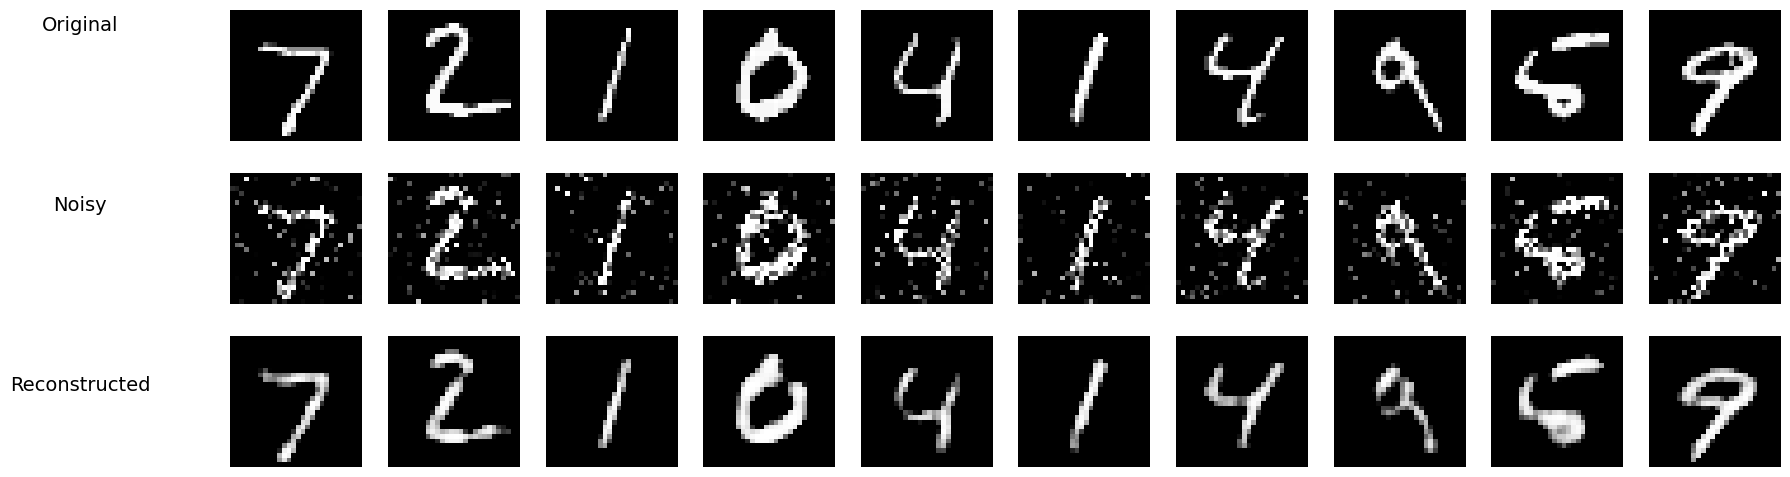

In [ ]:
# Visualizando uma mostra
dataiter = iter(testloader)
images, labels = next(dataiter)
images = images.view(images.size(0), -1).to(device)
images_ruidosas = adicionar_ruido(images)

# Obter saídas do autoencoder_denoising
output = autoencoder_denoising(images_ruidosas)
images = images.view(images.size(0), 1, 28, 28).cpu()
output = output.view(output.size(0), 1, 28, 28).cpu()
images_ruidosas = images_ruidosas.view(images_ruidosas.size(0), 1, 28, 28).cpu()

# Restringindo os valores do tensor para o intervalo [0, 1] (para o matplotlib poder exibir sem erros)
images = torch.clamp(images, 0, 1)
output = torch.clamp(output, 0, 1)
images_ruidosas = torch.clamp(images_ruidosas, 0, 1)

# Selecionar apenas a primeira linha de exemplos (por exemplo, 8 imagens)
num_images = 10
images = images[:num_images]
output = output[:num_images]
images_ruidosas = images_ruidosas[:num_images]

# Plotar imagens originais, ruidosas e reconstruídas
fig, axes = plt.subplots(3, num_images, figsize=(num_images * 2, 6))

# Adicionar rótulo horizontal à esquerda da linha de imagens originais
fig.text(0.05, 0.85, 'Original', ha='center', va='center', fontsize=14, rotation=0)

# Adicionar rótulo horizontal à esquerda da linha de imagens ruidosas
fig.text(0.05, 0.55, 'Noisy', ha='center', va='center', fontsize=14, rotation=0)

# Adicionar rótulo horizontal à esquerda da linha de imagens reconstruídas
fig.text(0.05, 0.25, 'Reconstructed', ha='center', va='center', fontsize=14, rotation=0)

# Plotar imagens originais
for i in range(num_images):
    axes[0, i].imshow(images[i].permute(1, 2, 0).detach().numpy(), cmap='gray')
    axes[0, i].axis('off')

# Plotar imagens ruidosas
for i in range(num_images):
    axes[1, i].imshow(images_ruidosas[i].permute(1, 2, 0).detach().numpy(), cmap='gray')
    axes[1, i].axis('off')

# Plotar imagens reconstruídas
for i in range(num_images):
    axes[2, i].imshow(output[i].permute(1, 2, 0).detach().numpy(), cmap='gray')
    axes[2, i].axis('off')

plt.show()